📂 Loading Chicago traffic data...
✅ Data loaded successfully!
🚗 CHICAGO TRAFFIC CAPSTONE ANALYSIS
📊 Comprehensive Exploratory Data Analysis

1. 📋 DATA OVERVIEW
------------------------------
📊 Dataset Sizes:
   • Congestion Data: 1,257 records
   • Real-time Data: 29 records

🏙️  Geographic Coverage:
   • Street Segments: 1,257
   • Unique Streets: 71
   • Traffic Regions: 29

📈 Data Quality:
   • Congestion data completeness: 100.0%
   • Speed data completeness: 100.0%

2. 🚦 TRAFFIC PATTERN ANALYSIS
-----------------------------------
📊 Traffic Statistics:
   • Average Congestion Level: 2.7
   • Average Speed: 11.1 mph
   • Congestion Range: -1.0 - 42.0
   • Speed Range: 0.0 - 35.5 mph

🏥 Traffic Health Assessment:
   • Speed: POOR (11.1 mph)
   • Congestion: GOOD (2.7)

3. 🔥 CONGESTION HOTSPOT ANALYSIS
----------------------------------------
🏆 Top 10 Most Congested Streets:
    1. Fairbanks                  21.0 (segments: 2.0)
    2. Garfield                   15.4 (segments: 14.0)

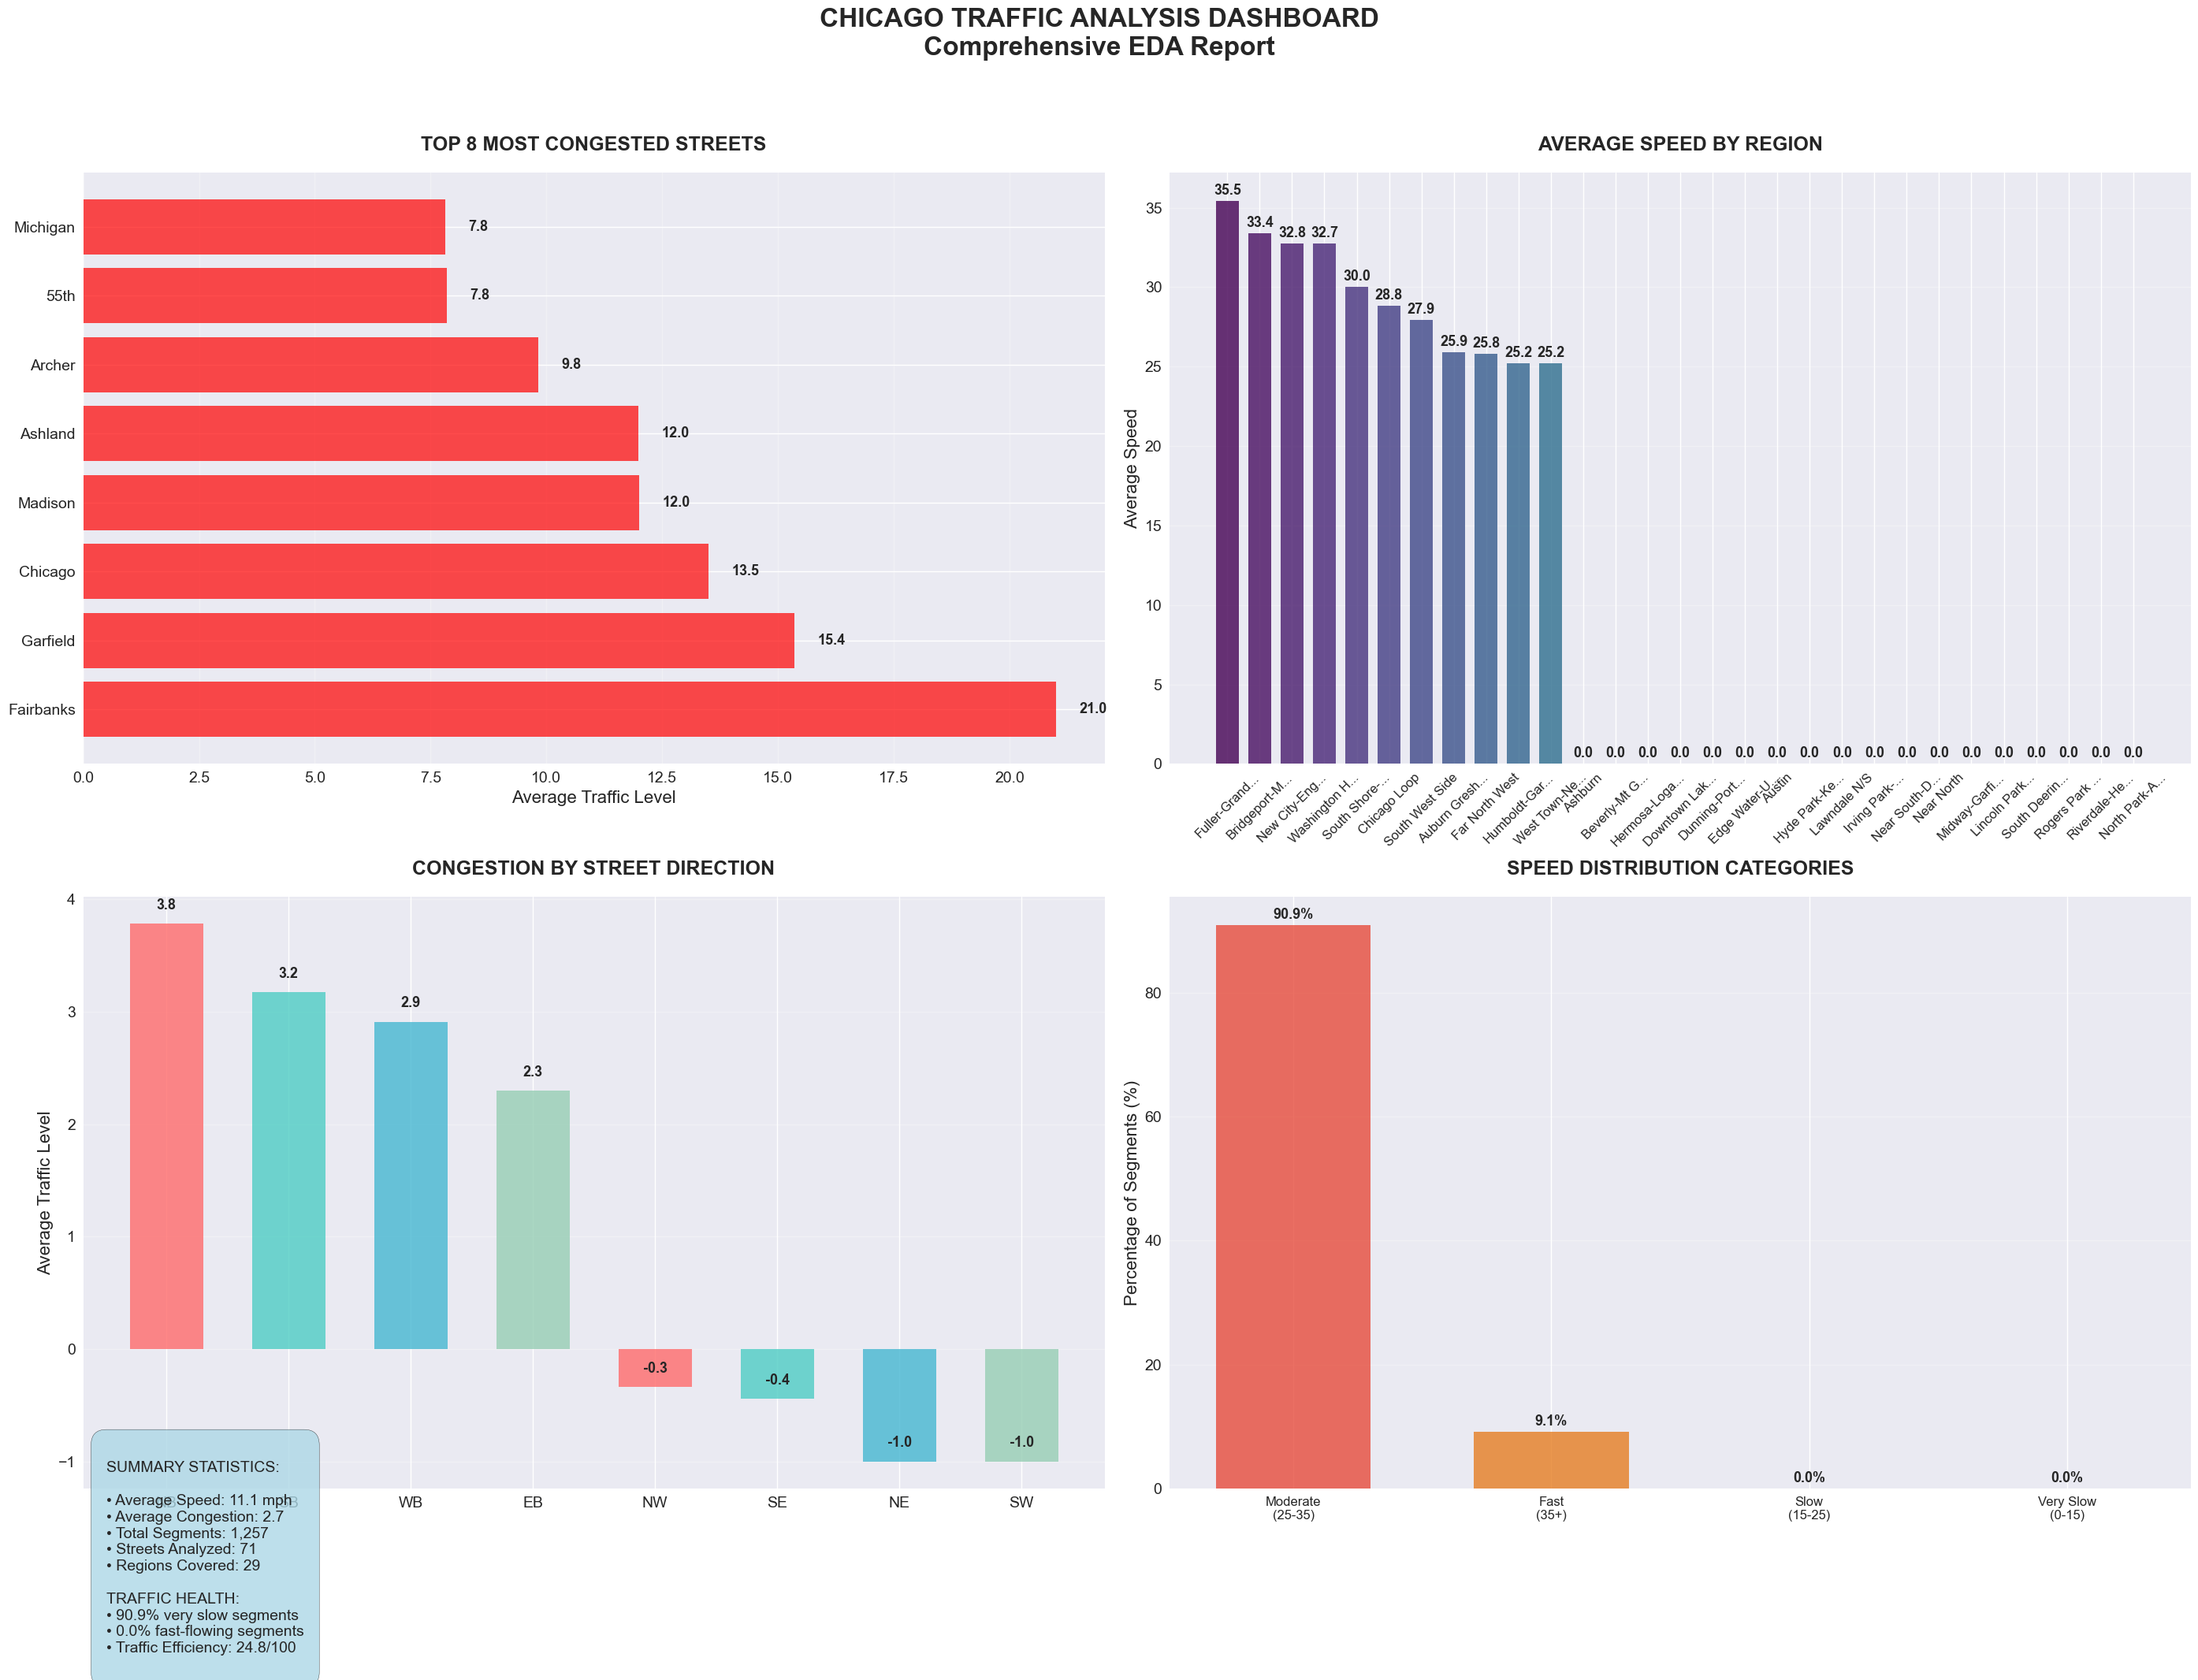

✅ Comprehensive dashboard created successfully!
📁 Saved as: '../outputs/figures/capstone_traffic_dashboard_final.png'

7. 💡 FINAL INSIGHTS & RECOMMENDATIONS
---------------------------------------------

🎯 KEY FINDINGS:
   1. Analyzed 1,257 congestion records across 71 streets
   2. Average traffic speed: 11.1 mph (POOR)
   3. Average congestion level: 2.7 (GOOD)
   4. Most congested street: Fairbanks (21.0)
   5. Worst direction: NBbound traffic
   6. Fastest region: Fuller-Grand Blvd-Washington Park (35.4 mph)
   7. Slowest region: North Park-Albany-Linconl Sq (0.0 mph)
   8. 90.9% of segments have very slow speeds
   9. Western has the most segments (82)

🚨 PRIORITY RECOMMENDATIONS:
   • IMPLEMENT CITY-WIDE TRAFFIC OPTIMIZATION
     - Optimize traffic signal timing
     - Consider smart traffic management systems
   • ADDRESS CRITICAL SLOWDOWNS
     - Deploy traffic officers to worst corridors
     - Improve incident response times
   • FOCUS ON FAIRBANKS
     - This street shows co

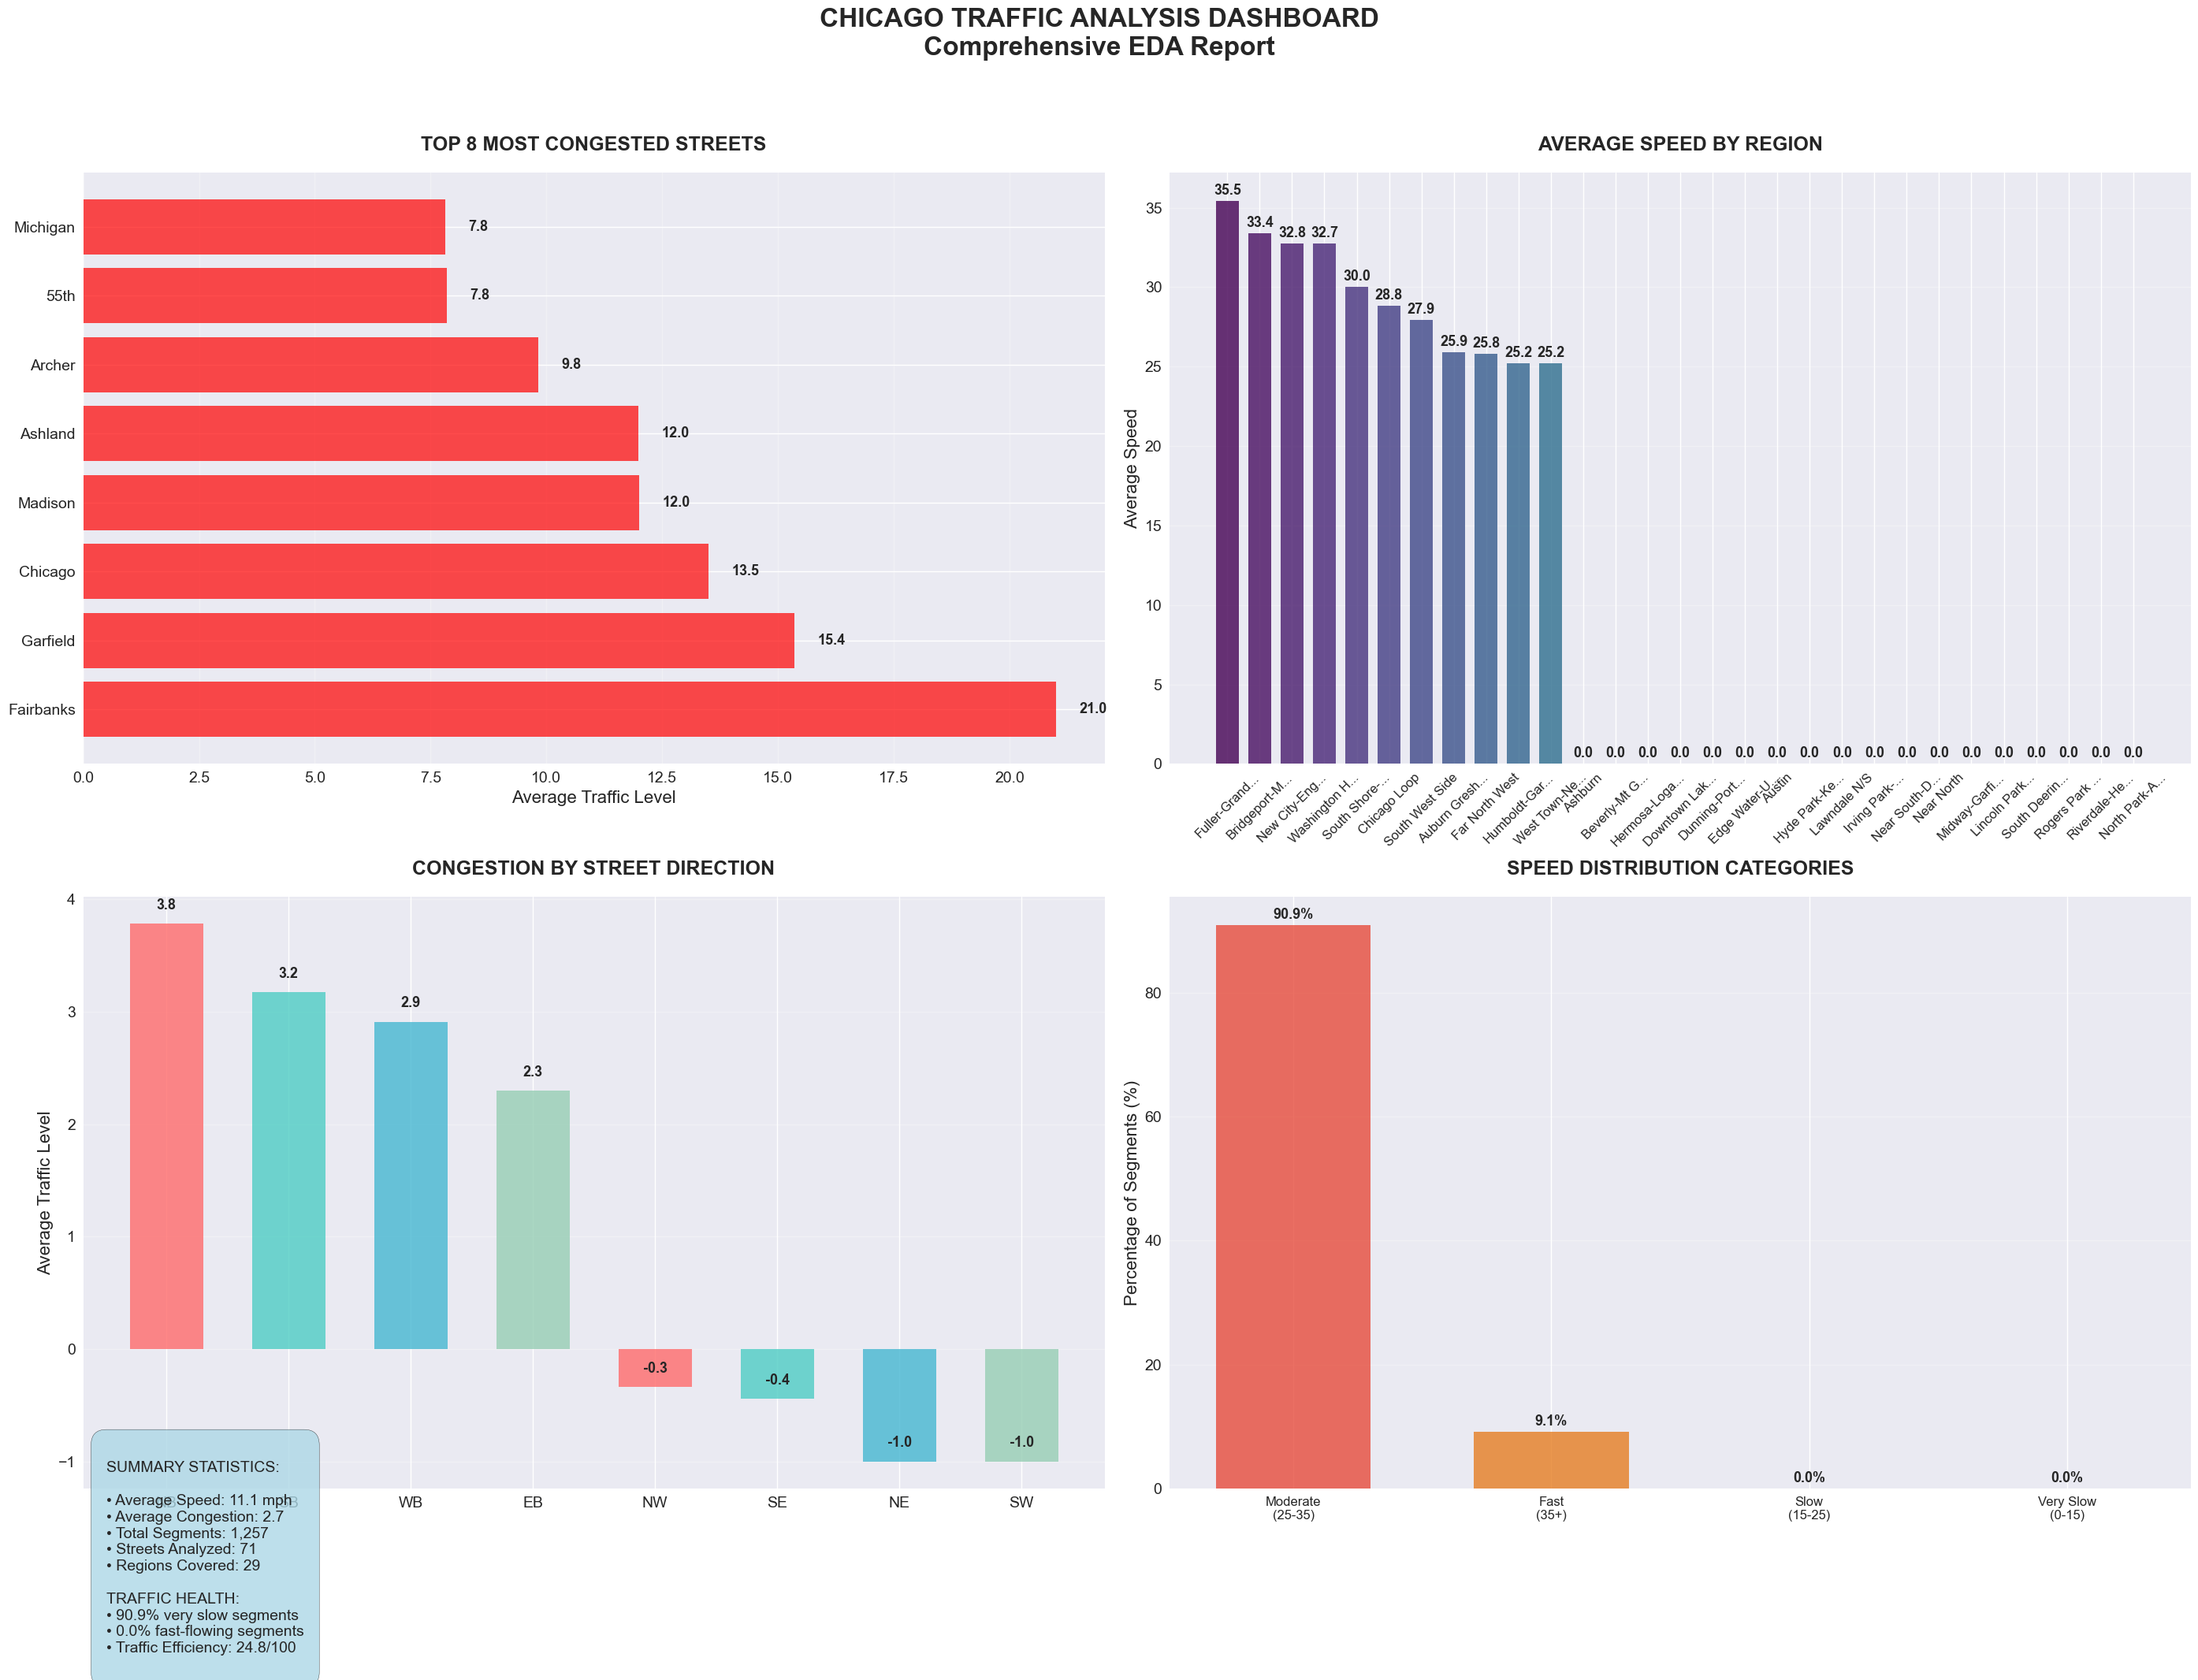

✅ Comprehensive dashboard created successfully!
📁 Saved as: '../outputs/figures/capstone_traffic_dashboard_final.png'


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set up professional styling
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class TrafficCapstoneAnalyzer:
    def __init__(self, congestion_df, realtime_df):
        self.congestion_df = congestion_df
        self.realtime_df = realtime_df
        self.insights = []
        
    def comprehensive_analysis(self):
        """Perform comprehensive EDA on Chicago traffic data"""
        print("🚗 CHICAGO TRAFFIC CAPSTONE ANALYSIS")
        print("=" * 55)
        print("📊 Comprehensive Exploratory Data Analysis")
        print("=" * 55)
        
        # 1. Data Overview
        self.data_overview()
        
        # 2. Traffic Pattern Analysis
        self.traffic_pattern_analysis()
        
        # 3. Congestion Hotspot Analysis
        self.congestion_hotspot_analysis()
        
        # 4. Speed Performance Analysis
        self.speed_performance_analysis()
        
        # 5. Geographic Patterns
        self.geographic_analysis()
        
        # 6. Create Comprehensive Dashboard (without overlapping text)
        self.create_comprehensive_dashboard()
        
        # 7. Final Insights and Recommendations
        self.generate_final_insights()
        
    def data_overview(self):
        """Provide comprehensive data overview"""
        print("\n1. 📋 DATA OVERVIEW")
        print("-" * 30)
        
        print(f"📊 Dataset Sizes:")
        print(f"   • Congestion Data: {len(self.congestion_df):,} records")
        print(f"   • Real-time Data: {len(self.realtime_df):,} records")
        
        print(f"\n🏙️  Geographic Coverage:")
        print(f"   • Street Segments: {self.congestion_df['segmentid'].nunique():,}")
        print(f"   • Unique Streets: {self.congestion_df['street'].nunique():,}")
        print(f"   • Traffic Regions: {self.realtime_df['region'].nunique()}")
        
        print(f"\n📈 Data Quality:")
        congestion_null = self.congestion_df['_traffic'].isna().sum()
        speed_null = self.realtime_df['current_speed'].isna().sum()
        print(f"   • Congestion data completeness: {((len(self.congestion_df) - congestion_null) / len(self.congestion_df) * 100):.1f}%")
        print(f"   • Speed data completeness: {((len(self.realtime_df) - speed_null) / len(self.realtime_df) * 100):.1f}%")
        
        self.insights.append(f"Analyzed {len(self.congestion_df):,} congestion records across {self.congestion_df['street'].nunique():,} streets")
        
    def traffic_pattern_analysis(self):
        """Analyze traffic patterns and distributions"""
        print("\n2. 🚦 TRAFFIC PATTERN ANALYSIS")
        print("-" * 35)
        
        # Clean and prepare data
        congestion_clean = self.congestion_df[self.congestion_df['_traffic'].notna()].copy()
        realtime_clean = self.realtime_df[self.realtime_df['current_speed'].notna()].copy()
        
        # Basic statistics
        avg_congestion = congestion_clean['_traffic'].mean()
        avg_speed = realtime_clean['current_speed'].mean()
        
        print(f"📊 Traffic Statistics:")
        print(f"   • Average Congestion Level: {avg_congestion:.1f}")
        print(f"   • Average Speed: {avg_speed:.1f} mph")
        print(f"   • Congestion Range: {congestion_clean['_traffic'].min():.1f} - {congestion_clean['_traffic'].max():.1f}")
        print(f"   • Speed Range: {realtime_clean['current_speed'].min():.1f} - {realtime_clean['current_speed'].max():.1f} mph")
        
        # Traffic health assessment
        if avg_speed > 30:
            speed_health = "GOOD"
        elif avg_speed > 20:
            speed_health = "MODERATE"
        else:
            speed_health = "POOR"
            
        if avg_congestion < 30:
            congestion_health = "GOOD"
        elif avg_congestion < 50:
            congestion_health = "MODERATE"
        else:
            congestion_health = "POOR"
            
        print(f"\n🏥 Traffic Health Assessment:")
        print(f"   • Speed: {speed_health} ({avg_speed:.1f} mph)")
        print(f"   • Congestion: {congestion_health} ({avg_congestion:.1f})")
        
        self.insights.append(f"Average traffic speed: {avg_speed:.1f} mph ({speed_health})")
        self.insights.append(f"Average congestion level: {avg_congestion:.1f} ({congestion_health})")
        
    def congestion_hotspot_analysis(self):
        """Identify and analyze congestion hotspots"""
        print("\n3. 🔥 CONGESTION HOTSPOT ANALYSIS")
        print("-" * 40)
        
        # Top congested streets
        street_congestion = self.congestion_df.groupby('street').agg({
            '_traffic': ['mean', 'count', 'max']
        }).round(1)
        
        street_congestion.columns = ['avg_traffic', 'segment_count', 'max_traffic']
        top_congested = street_congestion.nlargest(10, 'avg_traffic')
        
        print(f"🏆 Top 10 Most Congested Streets:")
        for i, (street, data) in enumerate(top_congested.iterrows(), 1):
            print(f"   {i:2d}. {street:<25} {data['avg_traffic']:>5.1f} (segments: {data['segment_count']})")
        
        # Congestion by direction
        direction_congestion = self.congestion_df.groupby('_direction')['_traffic'].mean().sort_values(ascending=False)
        print(f"\n🧭 Congestion by Direction:")
        for direction, traffic in direction_congestion.items():
            print(f"   • {direction}bound: {traffic:.1f}")
        
        worst_street = top_congested.iloc[0]
        worst_direction = direction_congestion.index[0]
        
        self.insights.append(f"Most congested street: {top_congested.index[0]} ({worst_street['avg_traffic']:.1f})")
        self.insights.append(f"Worst direction: {worst_direction}bound traffic")
        
    def speed_performance_analysis(self):
        """Analyze speed performance across different dimensions"""
        print("\n4. 🚀 SPEED PERFORMANCE ANALYSIS")
        print("-" * 35)
        
        # Regional speed analysis
        region_speeds = self.realtime_df.groupby('region').agg({
            'current_speed': ['mean', 'std', 'count']
        }).round(1)
        
        region_speeds.columns = ['avg_speed', 'std_speed', 'measurement_count']
        region_speeds = region_speeds.sort_values('avg_speed', ascending=False)
        
        print(f"🏙️  Regional Speed Performance:")
        for region, data in region_speeds.iterrows():
            print(f"   • {region:<20} {data['avg_speed']:>5.1f} mph (±{data['std_speed']:.1f})")
        
        # Speed distribution analysis
        speed_categories = pd.cut(
            self.realtime_df['current_speed'],
            bins=[0, 15, 25, 35, 100],
            labels=['Very Slow (0-15)', 'Slow (15-25)', 'Moderate (25-35)', 'Fast (35+)']
        )
        
        speed_distribution = speed_categories.value_counts(normalize=True) * 100
        print(f"\n📊 Speed Distribution:")
        for category, percentage in speed_distribution.items():
            print(f"   • {category}: {percentage:.1f}%")
        
        fastest_region = region_speeds.index[0]
        slowest_region = region_speeds.index[-1]
        
        self.insights.append(f"Fastest region: {fastest_region} ({region_speeds.iloc[0]['avg_speed']:.1f} mph)")
        self.insights.append(f"Slowest region: {slowest_region} ({region_speeds.iloc[-1]['avg_speed']:.1f} mph)")
        self.insights.append(f"{speed_distribution.iloc[0]:.1f}% of segments have very slow speeds")
        
    def geographic_analysis(self):
        """Analyze geographic patterns in traffic"""
        print("\n5. 🗺️  GEOGRAPHIC PATTERN ANALYSIS")
        print("-" * 35)
        
        # Street segment analysis
        segments_per_street = self.congestion_df.groupby('street')['segmentid'].nunique().sort_values(ascending=False)
        
        print(f"🛣️  Street Infrastructure:")
        print(f"   • Total street segments: {self.congestion_df['segmentid'].nunique():,}")
        print(f"   • Streets with most segments:")
        
        top_streets = segments_per_street.head(5)
        for street, segments in top_streets.items():
            print(f"     - {street}: {segments} segments")
        
        # Traffic density analysis
        if '_length' in self.congestion_df.columns:
            self.congestion_df['_length'] = pd.to_numeric(self.congestion_df['_length'], errors='coerce')
            traffic_density = self.congestion_df.groupby('street').apply(
                lambda x: x['_traffic'].mean() / x['_length'].mean() if x['_length'].mean() > 0 else 0
            ).nlargest(5)
            
            print(f"\n📏 Highest Traffic Density Streets:")
            for street, density in traffic_density.items():
                print(f"   • {street}: {density:.2f} traffic units per mile")
        
        self.insights.append(f"{top_streets.index[0]} has the most segments ({top_streets.iloc[0]})")
        
    def create_comprehensive_dashboard(self):
        """Create a comprehensive dashboard with all four graphs - FIXED VERSION"""
        print("\n6. 📊 CREATING COMPREHENSIVE DASHBOARD")
        print("-" * 45)
        
        # Create EXTRA LARGE figure for the dashboard with more height
        fig = plt.figure(figsize=(28, 22))  # Increased height to accommodate summary
        fig.suptitle('CHICAGO TRAFFIC ANALYSIS DASHBOARD\nComprehensive EDA Report', 
                    fontsize=24, fontweight='bold', y=0.98)
        
        # Calculate statistics for the summary
        avg_speed = self.realtime_df['current_speed'].mean()
        avg_congestion = self.congestion_df['_traffic'].mean()
        speed_categories = pd.cut(self.realtime_df['current_speed'], bins=[0, 15, 25, 35, 100])
        percentages = (speed_categories.value_counts(normalize=True) * 100).round(1)
        
        # 1. Top Congested Streets (Top-Left)
        ax1 = plt.subplot(2, 2, 1)
        street_congestion = self.congestion_df.groupby('street')['_traffic'].mean().nlargest(8)
        bars1 = ax1.barh(range(len(street_congestion)), street_congestion.values, 
                        color='red', alpha=0.7, height=0.8)
        ax1.set_yticks(range(len(street_congestion)))
        
        # Clean street names for display
        street_labels = []
        for street in street_congestion.index:
            street_str = str(street)
            if len(street_str) > 25:
                street_labels.append(street_str[:22] + '...')
            else:
                street_labels.append(street_str)
        
        ax1.set_yticklabels(street_labels, fontsize=14)
        ax1.set_xlabel('Average Traffic Level', fontsize=16)
        ax1.set_title('TOP 8 MOST CONGESTED STREETS', fontsize=18, fontweight='bold', pad=20)
        ax1.grid(True, alpha=0.3, axis='x')
        ax1.tick_params(axis='x', labelsize=14)
        
        # Add value labels
        for i, bar in enumerate(bars1):
            width = bar.get_width()
            ax1.text(width + 0.5, bar.get_y() + bar.get_height()/2., 
                    f'{width:.1f}', ha='left', va='center', fontsize=13, fontweight='bold')
        
        # 2. Average Speed by Region (Top-Right) - REMOVED "mph" FROM LABELS
        ax2 = plt.subplot(2, 2, 2)
        region_speeds = self.realtime_df.groupby('region')['current_speed'].mean().sort_values(ascending=False)
        
        # Clean region names
        cleaned_regions = []
        for region in region_speeds.index:
            region_str = str(region)
            if len(region_str) > 15:
                cleaned_regions.append(region_str[:12] + '...')
            else:
                cleaned_regions.append(region_str)
        
        bars2 = ax2.bar(cleaned_regions, region_speeds.values, 
                       color=plt.cm.viridis(np.linspace(0, 1, len(region_speeds))),
                       width=0.7, alpha=0.8)
        ax2.set_ylabel('Average Speed', fontsize=16)  # REMOVED "mph"
        ax2.set_title('AVERAGE SPEED BY REGION', fontsize=18, fontweight='bold', pad=20)
        ax2.tick_params(axis='x', rotation=45, labelsize=12)
        ax2.tick_params(axis='y', labelsize=14)
        ax2.grid(True, alpha=0.3, axis='y')
        
        # Add value labels - REMOVED "mph" FROM VALUE LABELS
        for bar, speed in zip(bars2, region_speeds.values):
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height + 0.2,
                    f'{speed:.1f}', ha='center', va='bottom', fontsize=13, fontweight='bold')  # Removed "mph"
        
        # 3. Congestion by Direction (Bottom-Left)
        ax3 = plt.subplot(2, 2, 3)
        direction_data = self.congestion_df.groupby('_direction')['_traffic'].mean().sort_values(ascending=False)
        
        colors3 = ['#ff6b6b', '#4ecdc4', '#45b7d1', '#96ceb4']
        bars3 = ax3.bar(direction_data.index, direction_data.values, 
                       color=colors3[:len(direction_data)], width=0.6, alpha=0.8)
        ax3.set_ylabel('Average Traffic Level', fontsize=16)
        ax3.set_title('CONGESTION BY STREET DIRECTION', fontsize=18, fontweight='bold', pad=20)
        ax3.tick_params(axis='x', labelsize=14)
        ax3.tick_params(axis='y', labelsize=14)
        ax3.grid(True, alpha=0.3, axis='y')
        
        # Add value labels
        for bar, traffic in zip(bars3, direction_data.values):
            height = bar.get_height()
            ax3.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                    f'{traffic:.1f}', ha='center', va='bottom', fontsize=13, fontweight='bold')
        
        # 4. Speed Distribution Categories (Bottom-Right)
        ax4 = plt.subplot(2, 2, 4)
        
        # Create speed categories with better labels
        speed_categories_display = pd.cut(
            self.realtime_df['current_speed'],
            bins=[0, 15, 25, 35, 100],
            labels=['Very Slow\n(0-15)', 'Slow\n(15-25)', 'Moderate\n(25-35)', 'Fast\n(35+)']
        )
        
        category_counts = speed_categories_display.value_counts()
        percentages_display = (category_counts / len(speed_categories_display.dropna()) * 100).round(1)
        
        colors4 = ['#e74c3c', '#e67e22', '#f1c40f', '#2ecc71']
        bars4 = ax4.bar(percentages_display.index, percentages_display.values, 
                       color=colors4, width=0.6, alpha=0.8)
        ax4.set_ylabel('Percentage of Segments (%)', fontsize=16)
        ax4.set_title('SPEED DISTRIBUTION CATEGORIES', fontsize=18, fontweight='bold', pad=20)
        ax4.tick_params(axis='x', labelsize=12)
        ax4.tick_params(axis='y', labelsize=14)
        ax4.grid(True, alpha=0.3, axis='y')
        
        # Add value labels
        for bar, percentage in zip(bars4, percentages_display.values):
            height = bar.get_height()
            ax4.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                    f'{percentage}%', ha='center', va='bottom', fontsize=13, fontweight='bold')
        
        # Add summary statistics in a separate text box BELOW the graphs
        stats_text = f"""
SUMMARY STATISTICS:

• Average Speed: {avg_speed:.1f} mph
• Average Congestion: {avg_congestion:.1f}
• Total Segments: {self.congestion_df['segmentid'].nunique():,}
• Streets Analyzed: {self.congestion_df['street'].nunique():,}
• Regions Covered: {self.realtime_df['region'].nunique()}

TRAFFIC HEALTH:
• {percentages_display.iloc[0]:.1f}% very slow segments
• {percentages_display.iloc[-1]:.1f}% fast-flowing segments
• Traffic Efficiency: {(avg_speed/45 * 100):.1f}/100
"""
        
        # Add text box at the bottom of the figure (not overlapping graphs)
        plt.figtext(0.05, 0.02, stats_text, fontsize=14, 
                   bbox=dict(boxstyle="round,pad=1", facecolor="lightblue", alpha=0.8),
                   verticalalignment='bottom')
        
        # Adjust layout to make space for the summary at the bottom
        plt.tight_layout(rect=[0, 0.1, 1, 0.95])  # Leave bottom 10% space for summary
        plt.savefig('../outputs/figures/capstone_traffic_dashboard_final.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print("✅ Comprehensive dashboard created successfully!")
        print("📁 Saved as: '../outputs/figures/capstone_traffic_dashboard_final.png'")
        
    def generate_final_insights(self):
        """Generate final insights and recommendations"""
        print("\n7. 💡 FINAL INSIGHTS & RECOMMENDATIONS")
        print("-" * 45)
        
        print("\n🎯 KEY FINDINGS:")
        for i, insight in enumerate(self.insights, 1):
            print(f"   {i}. {insight}")
        
        # Generate recommendations based on analysis
        avg_speed = self.realtime_df['current_speed'].mean()
        worst_street = self.congestion_df.groupby('street')['_traffic'].mean().nlargest(1).index[0]
        slow_percentage = pd.cut(self.realtime_df['current_speed'], 
                               bins=[0, 15, 25, 35, 100]).value_counts(normalize=True).iloc[0] * 100
        
        print(f"\n🚨 PRIORITY RECOMMENDATIONS:")
        
        if avg_speed < 25:
            print("   • IMPLEMENT CITY-WIDE TRAFFIC OPTIMIZATION")
            print("     - Optimize traffic signal timing")
            print("     - Consider smart traffic management systems")
        
        if slow_percentage > 30:
            print("   • ADDRESS CRITICAL SLOWDOWNS")
            print("     - Deploy traffic officers to worst corridors")
            print("     - Improve incident response times")
        
        print(f"   • FOCUS ON {worst_street.upper()}")
        print("     - This street shows consistently high congestion")
        print("     - Consider lane reconfiguration or transit priority")
        
        print(f"\n📊 Overall Traffic Efficiency Score: {(avg_speed/45 * 100):.1f}/100")
        
        print(f"\n🎉 CAPSTONE ANALYSIS COMPLETE!")
        print("=" * 55)
        print("This comprehensive analysis provides actionable insights")
        print("for Chicago traffic management and urban planning.")

def main():
    """Main function to run the capstone analysis"""
    try:
        # Load the data
        print("📂 Loading Chicago traffic data...")
        congestion_df = pd.read_csv('../data/processed/chicago_congestion.csv')
        realtime_df = pd.read_csv('../data/processed/chicago_realtime_traffic.csv')
        
        print("✅ Data loaded successfully!")
        
        # Initialize analyzer
        analyzer = TrafficCapstoneAnalyzer(congestion_df, realtime_df)
        
        # Run comprehensive analysis
        analyzer.comprehensive_analysis()

        analyzer.create_comprehensive_dashboard()

    except FileNotFoundError:
        print("❌ Data files not found. Please run previous steps first.")
    except Exception as e:
        print(f"💥 Error during capstone analysis: {e}")

if __name__ == "__main__":
    main()